# Carico il dataset

In [1]:
import small_DS_functions as sd
sd.steam.info()
sd.steam["author.playtime_last_two_weeks"].max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   app_id                          20000 non-null  int64         
 1   app_name                        20000 non-null  object        
 2   review_id                       20000 non-null  int64         
 3   language                        20000 non-null  object        
 4   review                          19934 non-null  object        
 5   timestamp_created               20000 non-null  datetime64[ns]
 6   timestamp_updated               20000 non-null  datetime64[ns]
 7   recommended                     20000 non-null  bool          
 8   votes_helpful                   20000 non-null  int64         
 9   votes_funny                     20000 non-null  int64         
 10  weighted_vote_score             20000 non-null  float64       
 11  co

18730.0

# RQ3

*Now it's important to understand the preferred time to do reviews.*
   - What is the most common time that authors review an application? For example, authors usually write a review at 17:44.


[('16:14-16:15', 32), ('14:32-14:33', 31), ('14:37-14:38', 31)]
[('14:00-14:30', 600), ('15:30-16:00', 596), ('14:30-15:00', 586)]


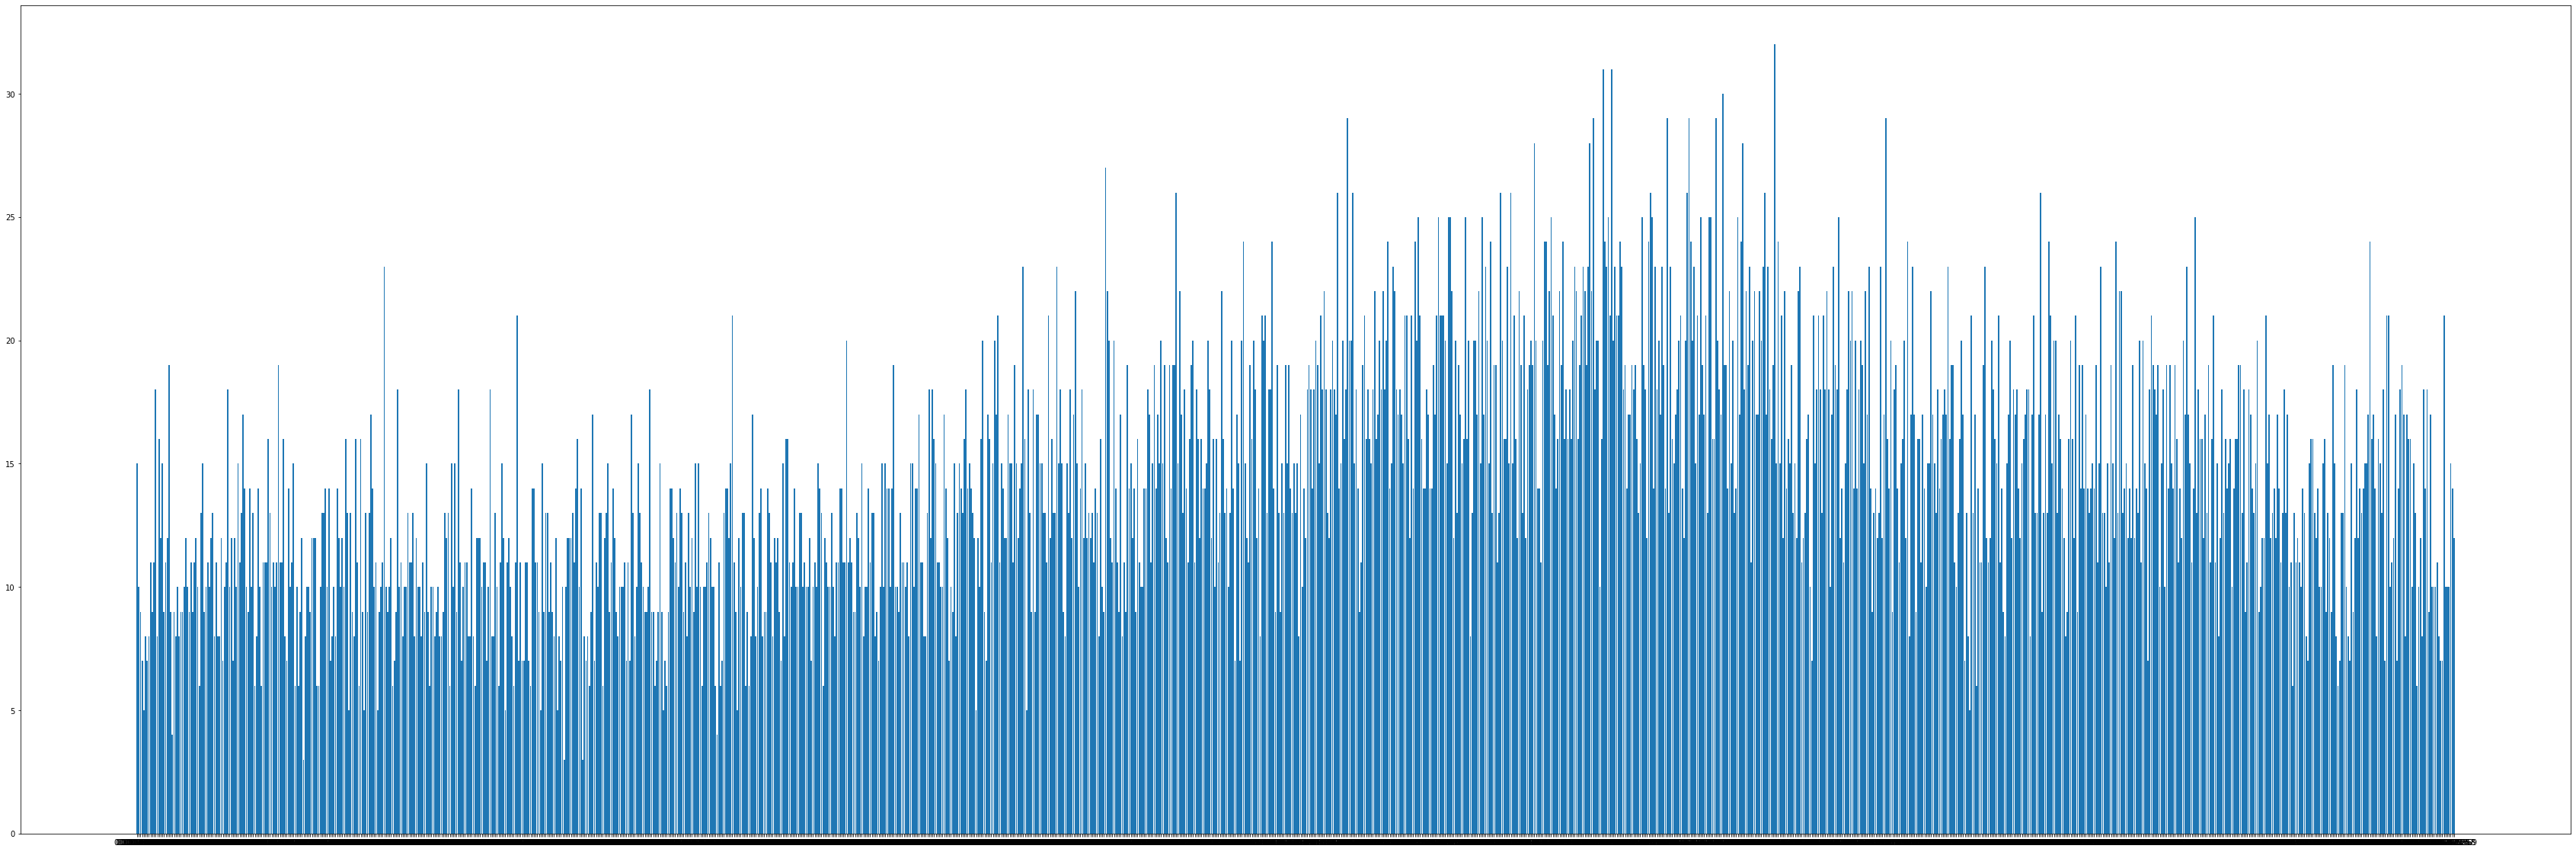

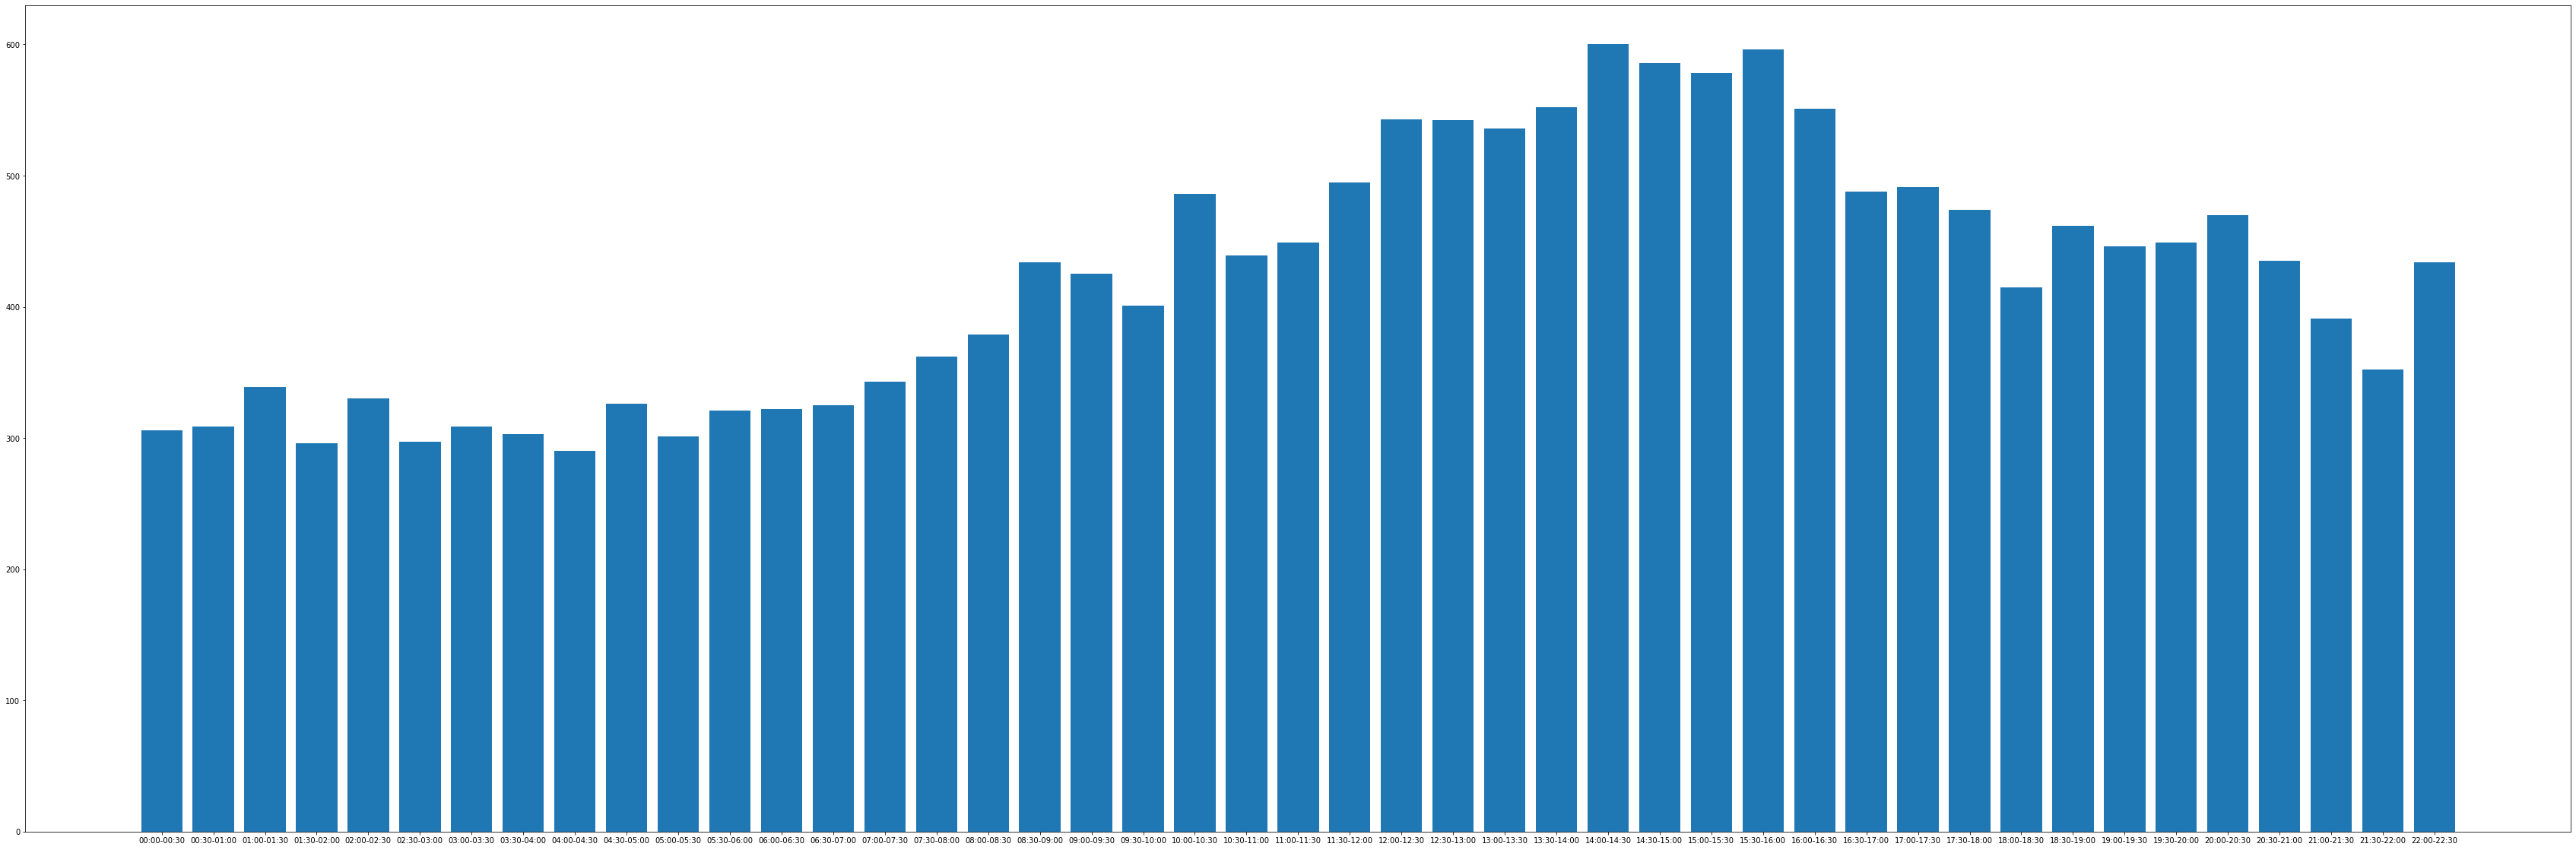

In [2]:
sd.plt.figure(1, figsize=(60,20))
barM, dicM = sd.numbersOfReviewByTime(sd.datetime_range(0,23,1))
print(sd.Counter(dicM).most_common(3))
sd.plt.figure(2, figsize=(60,20))
barH, dicH = sd.numbersOfReviewByTime(sd.datetime_range(0,23,30))
print(sd.Counter(dicH).most_common(3))

   - Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [ ]:
sd.numbersOfReviewForTime([["8:00", "10:00"],["13:00", "18:00"]])

    - Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

In [ ]:
sd.plt.figure(figsize=(15,15))
sd.numbersOfReviewForTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ4

In [ ]:
def reviewsForLanguages(dataset, languages):
    dataout = dataset[(dataset.language == languages[0])]
    
    for x in languages[1:]:
        
        dataout = sd.pd.concat([dataset[(dataset.language == x)], dataout], ignore_index = True)
        
    return dataout
    

In [ ]:
reviewsForLanguages(sd.steam, ["english", "italian"])

# RQ5

In [ ]:
sd.steam[["weighted_vote_score", "votes_helpful", "votes_funny"]]

# RQ6 test
   - What is the average time (days and minutes) a user lets pass before he updates a review?


In [18]:
t = sd.timedelta_updated_created()
t.describe()

count                        20000
mean        0 days 04:24:01.345350
std      1 days 15:47:35.540102217
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max               37 days 12:05:41
dtype: object

### NOTA

  - C'è un solo valore negativo: created < update ????

In [ ]:
t.sort_values()

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

In [ ]:
sd.plotBestAuthor_updater(3)

Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [ ]:
sd.numberOfUpdateAndNonUpdateForAuthor(3)

# RQ7
   - What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?


In [ ]:
sd.probabilityQuestion1()

   - What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [ ]:
sd.probabilityQuestion2()

 - Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [ ]:
sd.probabilityQuestion3()

### Answer: NO

# Testing

In [ ]:
sd.steam[(sd.steam["review"].isnull())]

In [ ]:
sd.steam.describe()
sd.steam["app_name"].describe()
sd.steam["author.num_games_owned"].describe()

In [ ]:
corr = sd.steam.corr()
corr

In [ ]:
fig = sd.plt.figure(figsize=(15,15))
sd.plt.matshow(corr, cmap="RdBu", fignum=fig.number)
sd.plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical");
sd.plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
sd.steam.info()
sd.steam["app_name"].drop_duplicates()

app_id                            10915
app_name                          10915
review_id                         10915
language                          10915
review                            10881
timestamp_updated                 10915
recommended                       10915
votes_helpful                     10915
votes_funny                       10915
weighted_vote_score               10915
comment_count                     10915
steam_purchase                    10915
received_for_free                 10915
written_during_early_access       10915
author.steamid                    10915
author.num_games_owned            10915
author.num_reviews                10915
author.playtime_forever           10915
author.playtime_last_two_weeks    10915
author.playtime_at_review         10915
author.last_played                10915
dtype: int64

In [44]:
sd.steam[["app_name", "recommended", "received_for_free", "steam_purchase"]].groupby(["app_name"]).sum()

,recommended,received_for_free,steam_purchase
app_name,,,
The Witcher 3: Wild Hunt,19409,302,18582


In [36]:
sd.steam[["app_name", "weighted_vote_score"]].groupby(["app_name"]).max()

,weighted_vote_score
app_name,
The Witcher 3: Wild Hunt,0.98147


<AxesSubplot:>

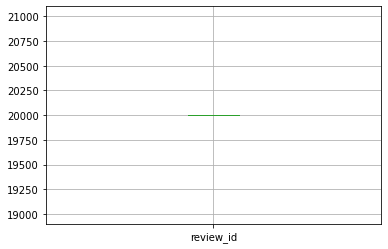

In [43]:
sd.steam[["app_name", "review_id"]].groupby(["app_name"]).count().boxplot()